In [1]:
%matplotlib inline

### Chi-square goodness-of-fit test
This testing is a statistical hypothesis test used to determine whether a variable is likely to come from a specified distribution or not. It is often used to evaluate whether sample data is representative of the full population. The test statistic value that we'll use is 

 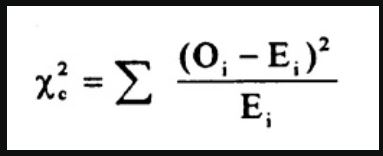 
 
 $$ image 1 $$

The main point of the formula above is that "this statistic value that we have is coming from a chi square distribution". As stated in the theorem by Pearson:

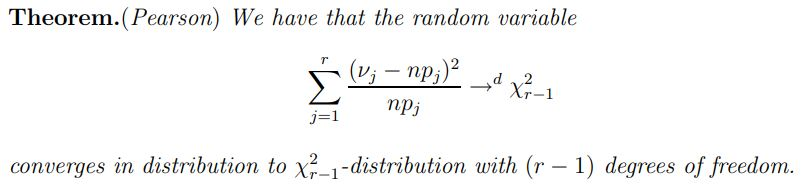

Let's say that we are expecting our data following exponential distribution with $\lambda = 4$. If this is true, this means that whichever sample that we took, will also follow exponential distribution with the same parameter $\lambda$. Let us take a look how the distribution will look like.

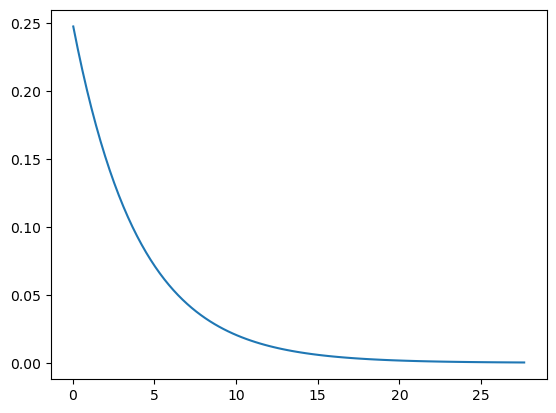

In [20]:
import numpy as np
from scipy.stats import expon
import matplotlib.pyplot as plt

oScale =4

x = np.linspace(expon.ppf(0.01, scale=oScale), expon.ppf(0.999, scale=oScale), 100)
rv = expon(scale=oScale)
fig, ax = plt.subplots(1, 1)

plt.plot(x,rv.pdf(x))
plt.show()

And now, we are going to take 100 samples each with a size of 1000 data.

In [21]:
import pandas as pd
oSample = [expon.rvs(scale=oScale,size=1000) for i in range(0,100)]   
oSample = pd.DataFrame(oSample)
oSample.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,5.227774,1.022695,6.900546,1.490519,2.368303,0.571968,0.288205,4.616768,9.042656,10.638348,...,0.921151,4.819793,0.166839,5.413754,5.170760,2.354075,2.060321,0.574610,17.704996,0.824068
1,0.755137,18.933622,7.277501,10.128830,0.016932,11.467585,2.334951,4.962911,2.545151,7.282401,...,4.587051,6.006078,5.708823,0.963280,2.090108,2.326032,3.216671,1.263940,5.000003,4.482727
2,7.184236,3.538429,0.823919,1.932519,0.699346,0.679551,0.524073,1.664595,13.462179,1.826705,...,0.607225,5.265341,4.876769,5.012633,2.408984,1.931242,1.356848,3.675896,2.305226,1.480196
3,1.414834,21.322027,2.353900,2.592123,0.406715,7.099363,3.911659,1.718937,0.722223,2.762180,...,14.534623,0.771040,0.836131,14.876070,2.136462,1.752329,4.992482,1.559123,1.128226,1.129181
4,0.946511,2.740119,1.942584,6.439731,5.998158,1.718303,0.888016,1.671833,1.393205,1.571296,...,4.434810,0.863639,14.346026,12.632886,0.580755,5.148854,0.763496,0.632474,5.191064,1.748300


Now that we have taken our samples, the next step is to calculate the statistic value. We'll use histogram bins to continue our work to check if the sample & population data is similar.

In [24]:
print(expon.cdf(3,scale=oScale),expon.cdf(6,scale=oScale),
     expon.cdf(9,scale=oScale),expon.cdf(12,scale=oScale),
     expon.cdf(15,scale=oScale),expon.cdf(18,scale=oScale),
     expon.cdf(21,scale=oScale),expon.cdf(24,scale=oScale),
     expon.cdf(27,scale=oScale),expon.cdf(30,scale=oScale))


0.5276334472589853 0.7768698398515702 0.8946007754381357 0.950212931632136 0.9764822541439909 0.9888910034617577 0.9947524816008186 0.9975212478233336 0.9988291203792088 0.9994469156298522


In [39]:
oBinned = oSample.apply(lambda x: pd.cut(x, [0,3,6,9,12,15,18]))
oFreq=[]
for i in range(0,1000):
    oCount = pd.value_counts(oBinned[i])
    oCount = oCount.sort_index()
    oCount = oCount.values.tolist()
    oFreq.append(np.asarray(oCount))

In [28]:
oFreq[995:]

[array([56, 32,  5,  1,  6,  0]),
 array([49, 29, 11,  3,  3,  1]),
 array([47, 30, 12,  5,  3,  0]),
 array([58, 22, 13,  2,  4,  1]),
 array([54, 27, 12,  6,  0,  1])]

We also should binned our population distribution, and then, we will use the formula on image 1 to calculate all statistic value (we'll have 1000 statistic value that come from each sample). But for the population distribution, with a size of 100, we are expecting:

* 53 counts for bin (0,3],
* 26 counts for bin (3,6],
* 11 counts for bin (6,9],
* 6 counts for bin (9,12],
* 3 counts for bin (12,15],
* 1 counts for bin (15,18].

In [30]:
oPopBinned = np.asarray([53,26,11,6,3,1])

In [31]:
chi = []
for i in range(0,1000):
    statval = sum(((oFreq[i]-oPopBinned)**2) / oPopBinned)
    chi.append(statval)

If we plot a histogram for this 1000 statistic value, will the graph look similar to a chi-square distribution? Let us see

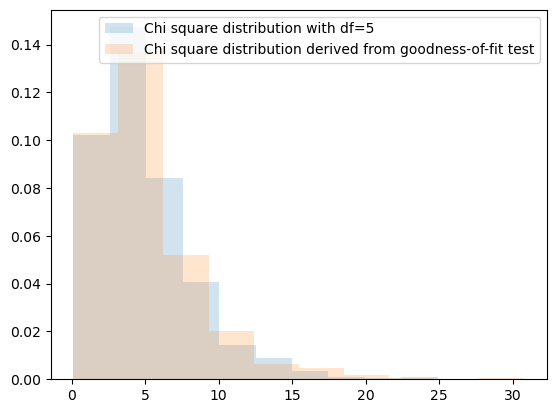

In [32]:
from scipy.stats import chi2

fig, ax = plt.subplots(1,1)

df = 5            # because we have 6 bins created
r = chi2.rvs(df, size=1000)

ax.hist(r, density=True,histtype='stepfilled', alpha=0.2, label='Chi square distribution with df=5')
ax.hist(chi, density=True,histtype='stepfilled', alpha=0.2, label='Chi square distribution derived from goodness-of-fit test')
plt.legend()
plt.show()

The histogram seems pretty similar with each other. In fact, the mean for the chi square that we derived from the goodness-of-fit test also quite near to the actual chi square distribution of df=5 (below this we get the mean for our chi square that derived from the goodness-of-fit test aprroximately $\approx$ 4).

In [45]:
avg_count = np.mean(oFreq, axis=0)
avg_count

array([52.823, 24.751, 11.891,  5.601,  2.566,  1.255])

In [48]:
midPoint = np.array([(0+3)/2, (3+6)/2, (6+9)/2, (9+12)/2, (12+15)/2, (15+18)/2])
sum((avg_count/100) * midPoint)

3.9395550000000004

To summarize, using the above formula in image 1 does ensure that our statistic value will converge to a chi square distribution. It is amazing how this technique has been developed long time ago using method of moments, CLT and vector calculus. For more information, you can refer to this link provided by MIT:

https://ocw.mit.edu/courses/18-443-statistics-for-applications-fall-2006/896115b23d713bde212c45f62c086080_lecture11.pdf